# Group 6: Artificial Intelligence Techniques Assignment

1. [SECTION 1: INTRODUCTION](#SECTION-1:-INTRODUCTION)
   
2. [SECTION 2: METHOD](#SECTION-2:-METHOD)
   1. [2.1: Data Description](#2.1:-Data-Description)
   2. [2.2: Data Exploration & Visualization](#2.2:-Data-Exploration-&-Visualization)
   3. [2.3: Data Preprocessing](#2.3:-Data-Preprocessing)
   4. [2.4: Model Training & Validation](#2.4:-Model-Training-&-Validation)
       1. [Model 1: Support-Vector-Machine (One Vs All Classifier)](#Model-1:-Support-Vector-Machine-(One-Vs-All-Classifier) )
       2. [Model 2: Random Forest Classifier](#Model-2:-Random-Forest-Classifier)
       3. [Model 3: Logistic Regression (Multinomial)](#Model-3:-Logistic-Regression-(Multinomial))
   5. [2.5: Model Tuning and Testing](#2.5:-Model-Tuning-and-Testing)
       1. [Model 1: Support-Vector-Machine (One Vs All Classifier)](#SVM-Classifier )
       2. [Model 2: Random Forest Classifier](#RandomForest-Classifier)
       3. [Model 3: Logistic Regression (Multinomial)](#Logistic-Classifier)
3. [SECTION 3: FEATURE INVESTIGATION](#SECTION-3:-FEATURE-INVESTIGATION)



# SECTION 1: INTRODUCTION

Cardiovascular diseases (CVDs) are a leading cause of death globally, affecting millions every year. Early detection and prevention are key to reducing this burden. Machine learning offers promising new tools to predict cardiovascular risks more accurately, enabling timely interventions and personalized healthcare.

## Objectives


1.	Develop and Evaluate Predictive Models: Train and evaluate multiple machine learning models, including Logistic Regression, Random Forest, and SVM, to predict cardiovascular risk levels (low, medium, high) based on the features provided in the dataset.
 
2.	Optimize Model Performance: Experiment with different hyperparameter settings, feature selection techniques, and regularization methods to optimize the performance of the models and achieve the highest possible prediction accuracy.
 
3.	Analyze and Interpret Results: Conduct a thorough analysis of the trained models, including understanding the impact of each feature on the prediction results, and interpret how model choices and preprocessing steps influence the accuracy and generalization of the predictions.


# SECTION 2: METHOD


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import label_binarize, OneHotEncoder, OrdinalEncoder, StandardScaler
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import (
    roc_curve, auc, precision_recall_curve, average_precision_score, 
    roc_auc_score, accuracy_score, classification_report, 
    confusion_matrix, precision_score, recall_score, f1_score
)
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_predict, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer

# Plotting libraries
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Load the dataset
ds = pd.read_csv('dataset.csv')

The “dataset.csv” dataset consists of 17 features (an individual’s demographic information,
eating habits, physical activities etc.) and one prediction output for three levels of cardiovascular
risk. The data contain certain complexity with missing data and noise. 

## 2.1: Data Description

In [3]:
# Display the first few rows of the dataset
print("First Few Rows of the Dataset:")
ds.head()

First Few Rows of the Dataset:


,Gender,Age,Height(cm),Weight(kg),Family_history,Alcohol,Junk_food,Vege_day,Meals_day,Snack,Smoking,Water_intake(L),Transportation,Exercise,TV,Income,Discipline,Cardiovascular_risk(y)
0,Female,42,172.2,82.9,no,low,yes,3,3,Sometimes,no,2.72,car,3,rare,2081,no,medium
1,Female,19,175.3,80.0,yes,none,yes,2,1,Sometimes,no,2.65,bus,3,moderate,5551,no,medium
2,Female,43,158.3,81.9,yes,none,yes,3,1,Sometimes,no,1.89,car,1,rare,14046,no,high
3,Female,23,165.0,70.0,yes,low,no,2,1,Sometimes,no,2.00,bus,0,rare,9451,no,medium
4,Male,23,169.0,75.0,yes,low,yes,3,3,Sometimes,no,2.82,bus,1,often,17857,no,medium


In [4]:
# Display some important information of the data set
print("\nInformation of the data set:")
ds.info()


Information of the data set:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2100 entries, 0 to 2099
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Gender                  2100 non-null   object 
 1   Age                     2100 non-null   int64  
 2   Height(cm)              2100 non-null   float64
 3   Weight(kg)              2100 non-null   float64
 4   Family_history          2100 non-null   object 
 5   Alcohol                 2100 non-null   object 
 6   Junk_food               2100 non-null   object 
 7   Vege_day                2100 non-null   int64  
 8   Meals_day               2100 non-null   int64  
 9   Snack                   2100 non-null   object 
 10  Smoking                 2100 non-null   object 
 11  Water_intake(L)         2100 non-null   float64
 12  Transportation          2100 non-null   object 
 13  Exercise                2100 non-null   int64  
 14  TV        

In [5]:
# Get the shape of the dataset (number of rows and columns)
print("\nShape of the Dataset:")
print(f"Rows: {ds.shape[0]}, Columns: {ds.shape[1]}")


Shape of the Dataset:
Rows: 2100, Columns: 18


In [6]:
# Check for missing values in the dataset
print("\nMissing Values in Each Column:")
ds.isnull().any()


Missing Values in Each Column:


Gender                    False
Age                       False
Height(cm)                False
Weight(kg)                False
Family_history            False
Alcohol                   False
Junk_food                 False
Vege_day                  False
Meals_day                 False
Snack                     False
Smoking                   False
Water_intake(L)           False
Transportation            False
Exercise                  False
TV                        False
Income                    False
Discipline                False
Cardiovascular_risk(y)    False
dtype: bool

In [7]:
# Display basic statistical information about the numerical columns
print("\nBasic Statistics of Numerical Features:")
ds.describe()


Basic Statistics of Numerical Features:


,Age,Height(cm),Weight(kg),Vege_day,Meals_day,Water_intake(L),Exercise,Income
count,2100.000000,2100.000000,2100.000000,2100.000000,2100.000000,2100.000000,2100.000000,2100.000000
mean,24.302381,170.148286,86.561571,2.423333,2.687143,2.007429,1.006190,9432.386190
std,6.342270,9.340941,26.192242,0.584318,0.810088,0.613122,0.894885,5002.350673
min,14.000000,145.000000,39.000000,1.000000,1.000000,1.000000,0.000000,1000.000000
25%,20.000000,163.000000,65.400000,2.000000,3.000000,1.577500,0.000000,4994.500000
50%,23.000000,170.000000,83.000000,2.000000,3.000000,2.000000,1.000000,9226.500000
75%,26.000000,176.800000,107.250000,3.000000,3.000000,2.480000,2.000000,13841.750000
max,61.000000,198.000000,173.000000,3.000000,4.000000,3.000000,3.000000,18000.000000


In [8]:
# Display unique values in categorical columns to understand their distribution
categorical_columns = ds.select_dtypes(include=['object']).columns
print("\nUnique Values in Categorical Features:")
for col in categorical_columns:
    print(f"{col}: {ds[col].unique()}")


Unique Values in Categorical Features:
Gender: ['Female' 'Male']
Family_history: ['no' 'yes']
Alcohol: ['low' 'none' 'medium' 'high']
Junk_food: ['yes' 'no']
Snack: ['Sometimes' 'Always' 'Frequently' 'No']
Smoking: ['no' 'yes']
Transportation: ['car' 'bus' 'walk' 'motorcycle' 'bicycle']
TV: ['rare' 'moderate' 'often']
Discipline: ['no' 'yes']
Cardiovascular_risk(y): ['medium' 'high' 'low']


## 2.2: Data Exploration & Visualization

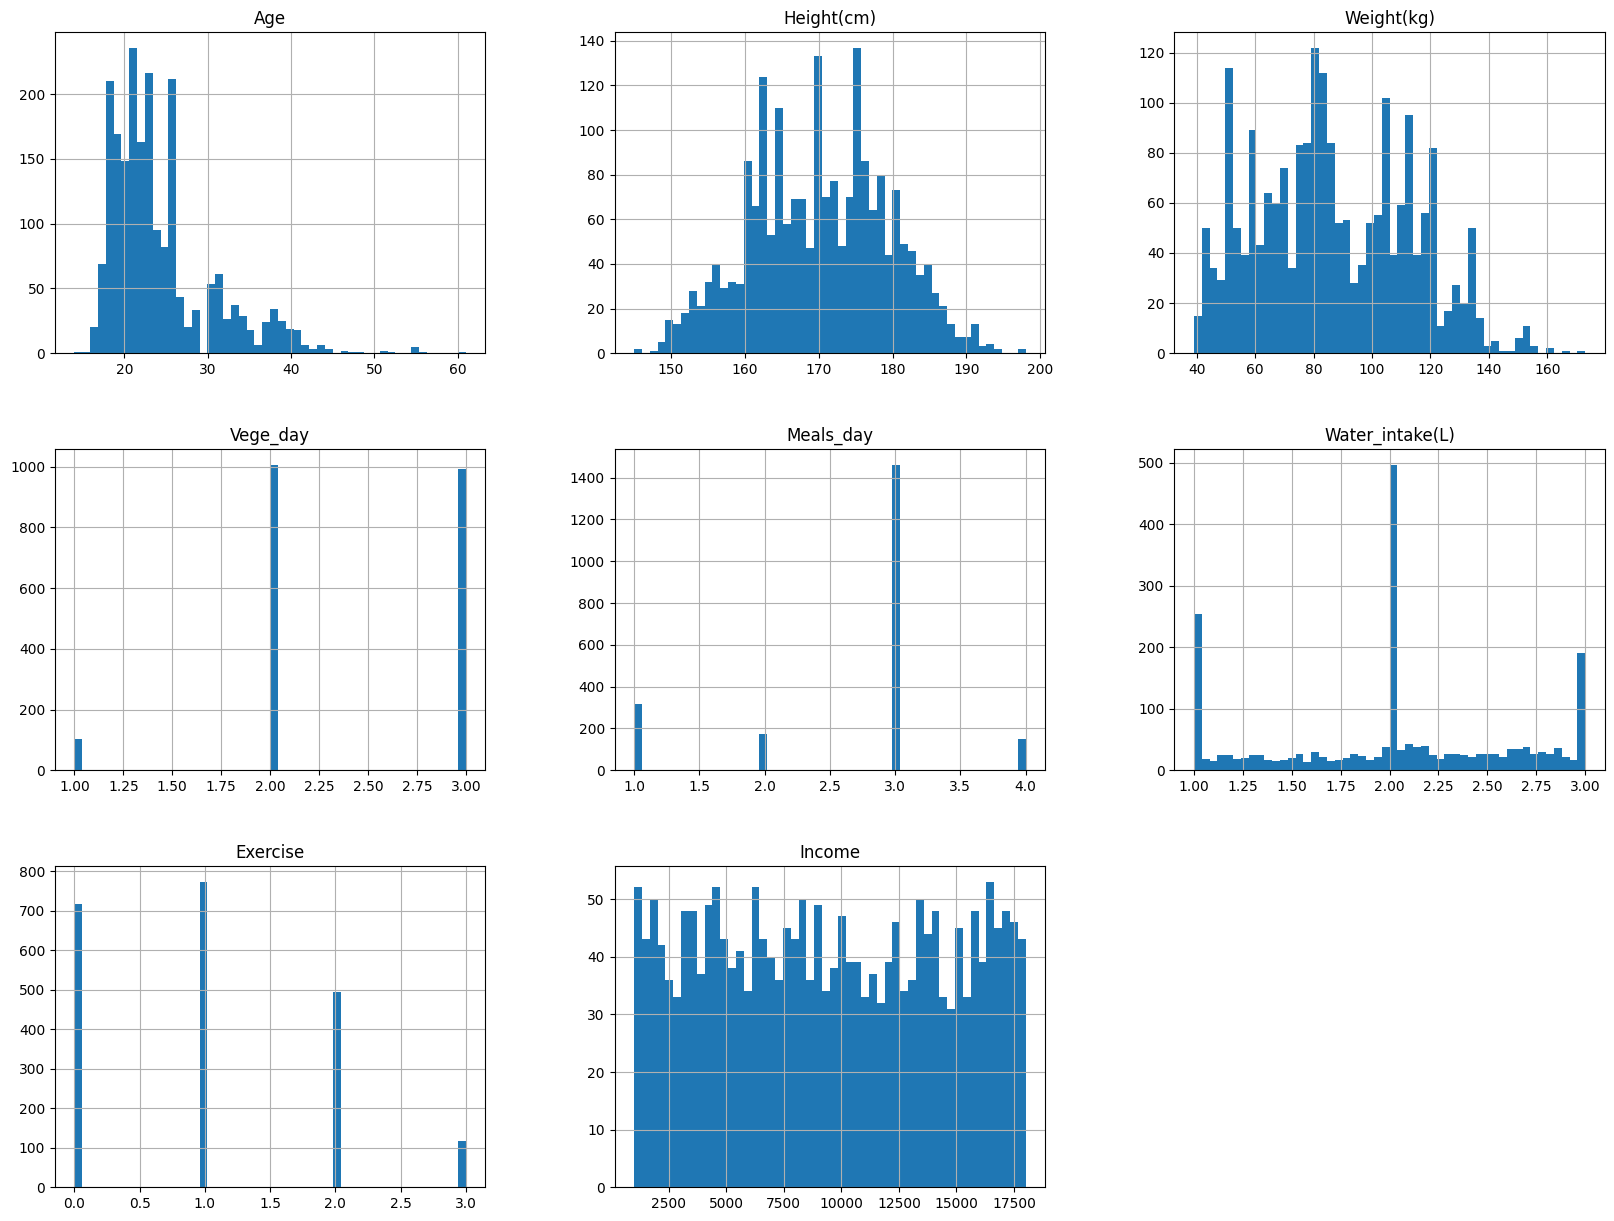

In [9]:
# Plotting histograms for all numerical features
ds.hist(bins=50, figsize=(20, 15))
plt.show()

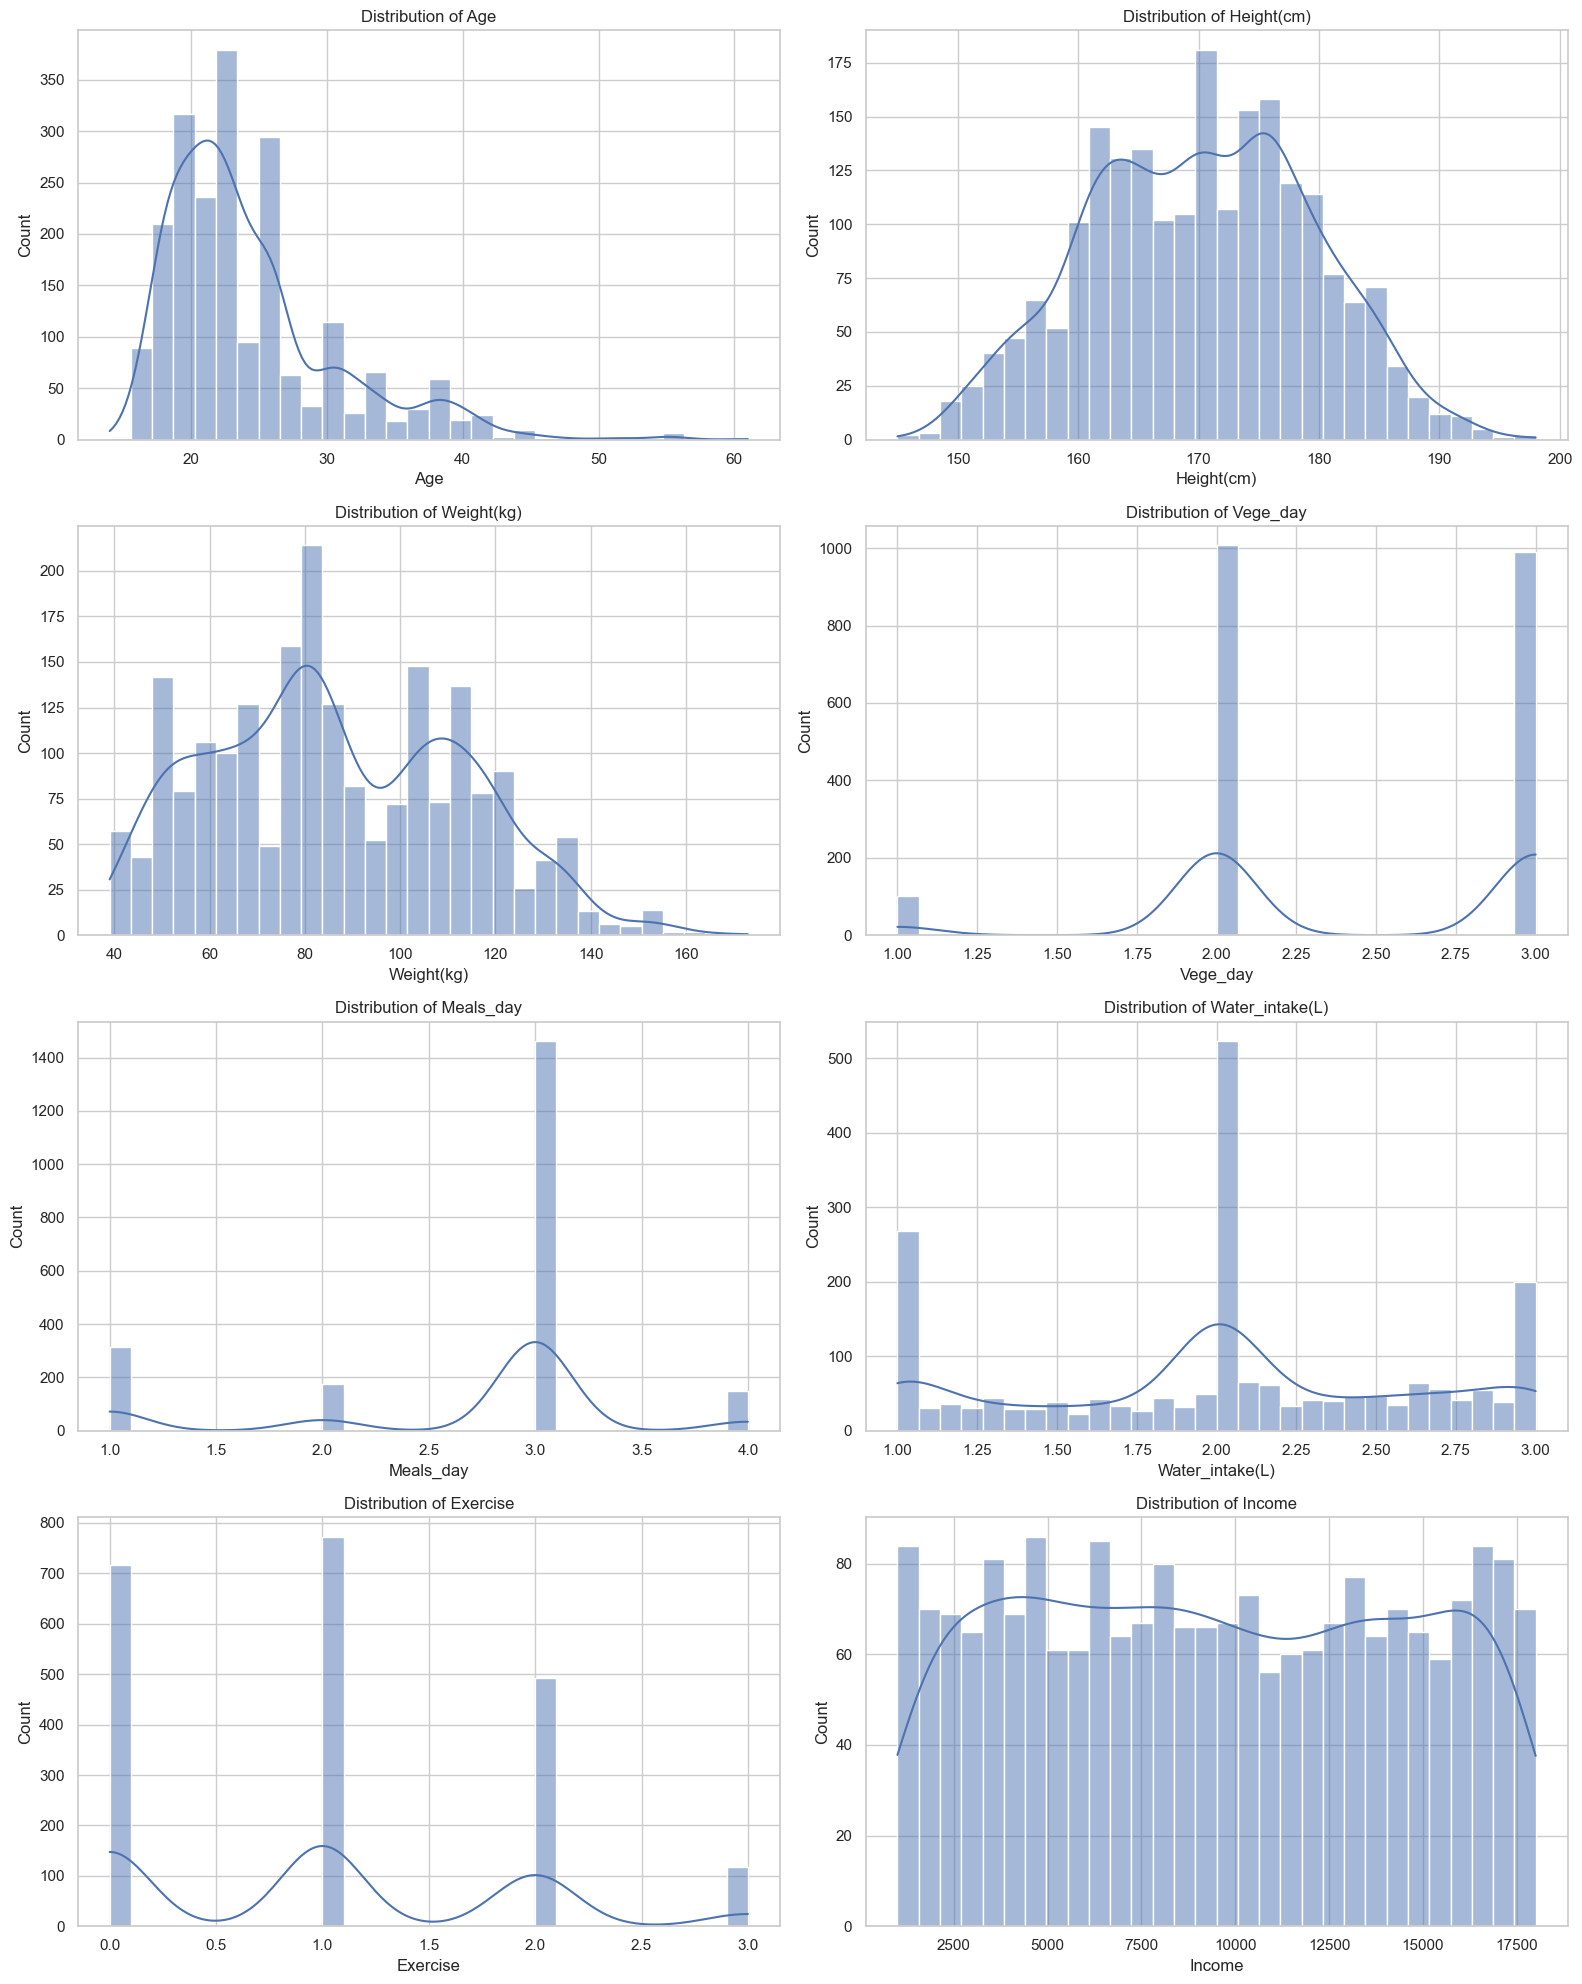

In [10]:
# Set the style for seaborn plots
sns.set(style="whitegrid")

# Create a grid of subplots with 4 rows and 2 columns, and set the figure size
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(16, 20))

# List all numerical features (columns) in the dataset 'ds'
numerical_features = ds.select_dtypes(include=['number']).columns.tolist()

# Loop through each numerical feature to create individual histograms
for i, feature in enumerate(numerical_features):
    # Plot histogram for each numerical feature with KDE (Kernel Density Estimate) overlaid
    sns.histplot(ds[feature], bins=30, kde=True, ax=axes[i//2, i%2])
    
    # Set the title for each subplot to indicate which feature is being plotted
    axes[i//2, i%2].set_title(f'Distribution of {feature}')

# Adjust the layout to prevent overlapping of subplots
plt.tight_layout()

plt.show()

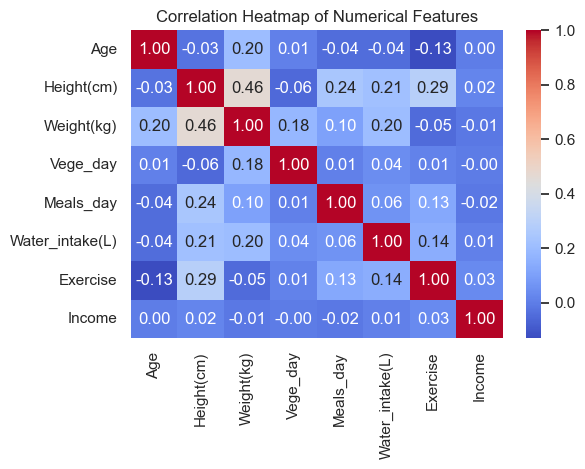

In [11]:
# Calculate the correlation matrix for numerical features only
numerical_ds = ds.select_dtypes(include=[float, int])
corr_matrix = numerical_ds.corr()

# Plot the correlation heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Numerical Features')
plt.show()


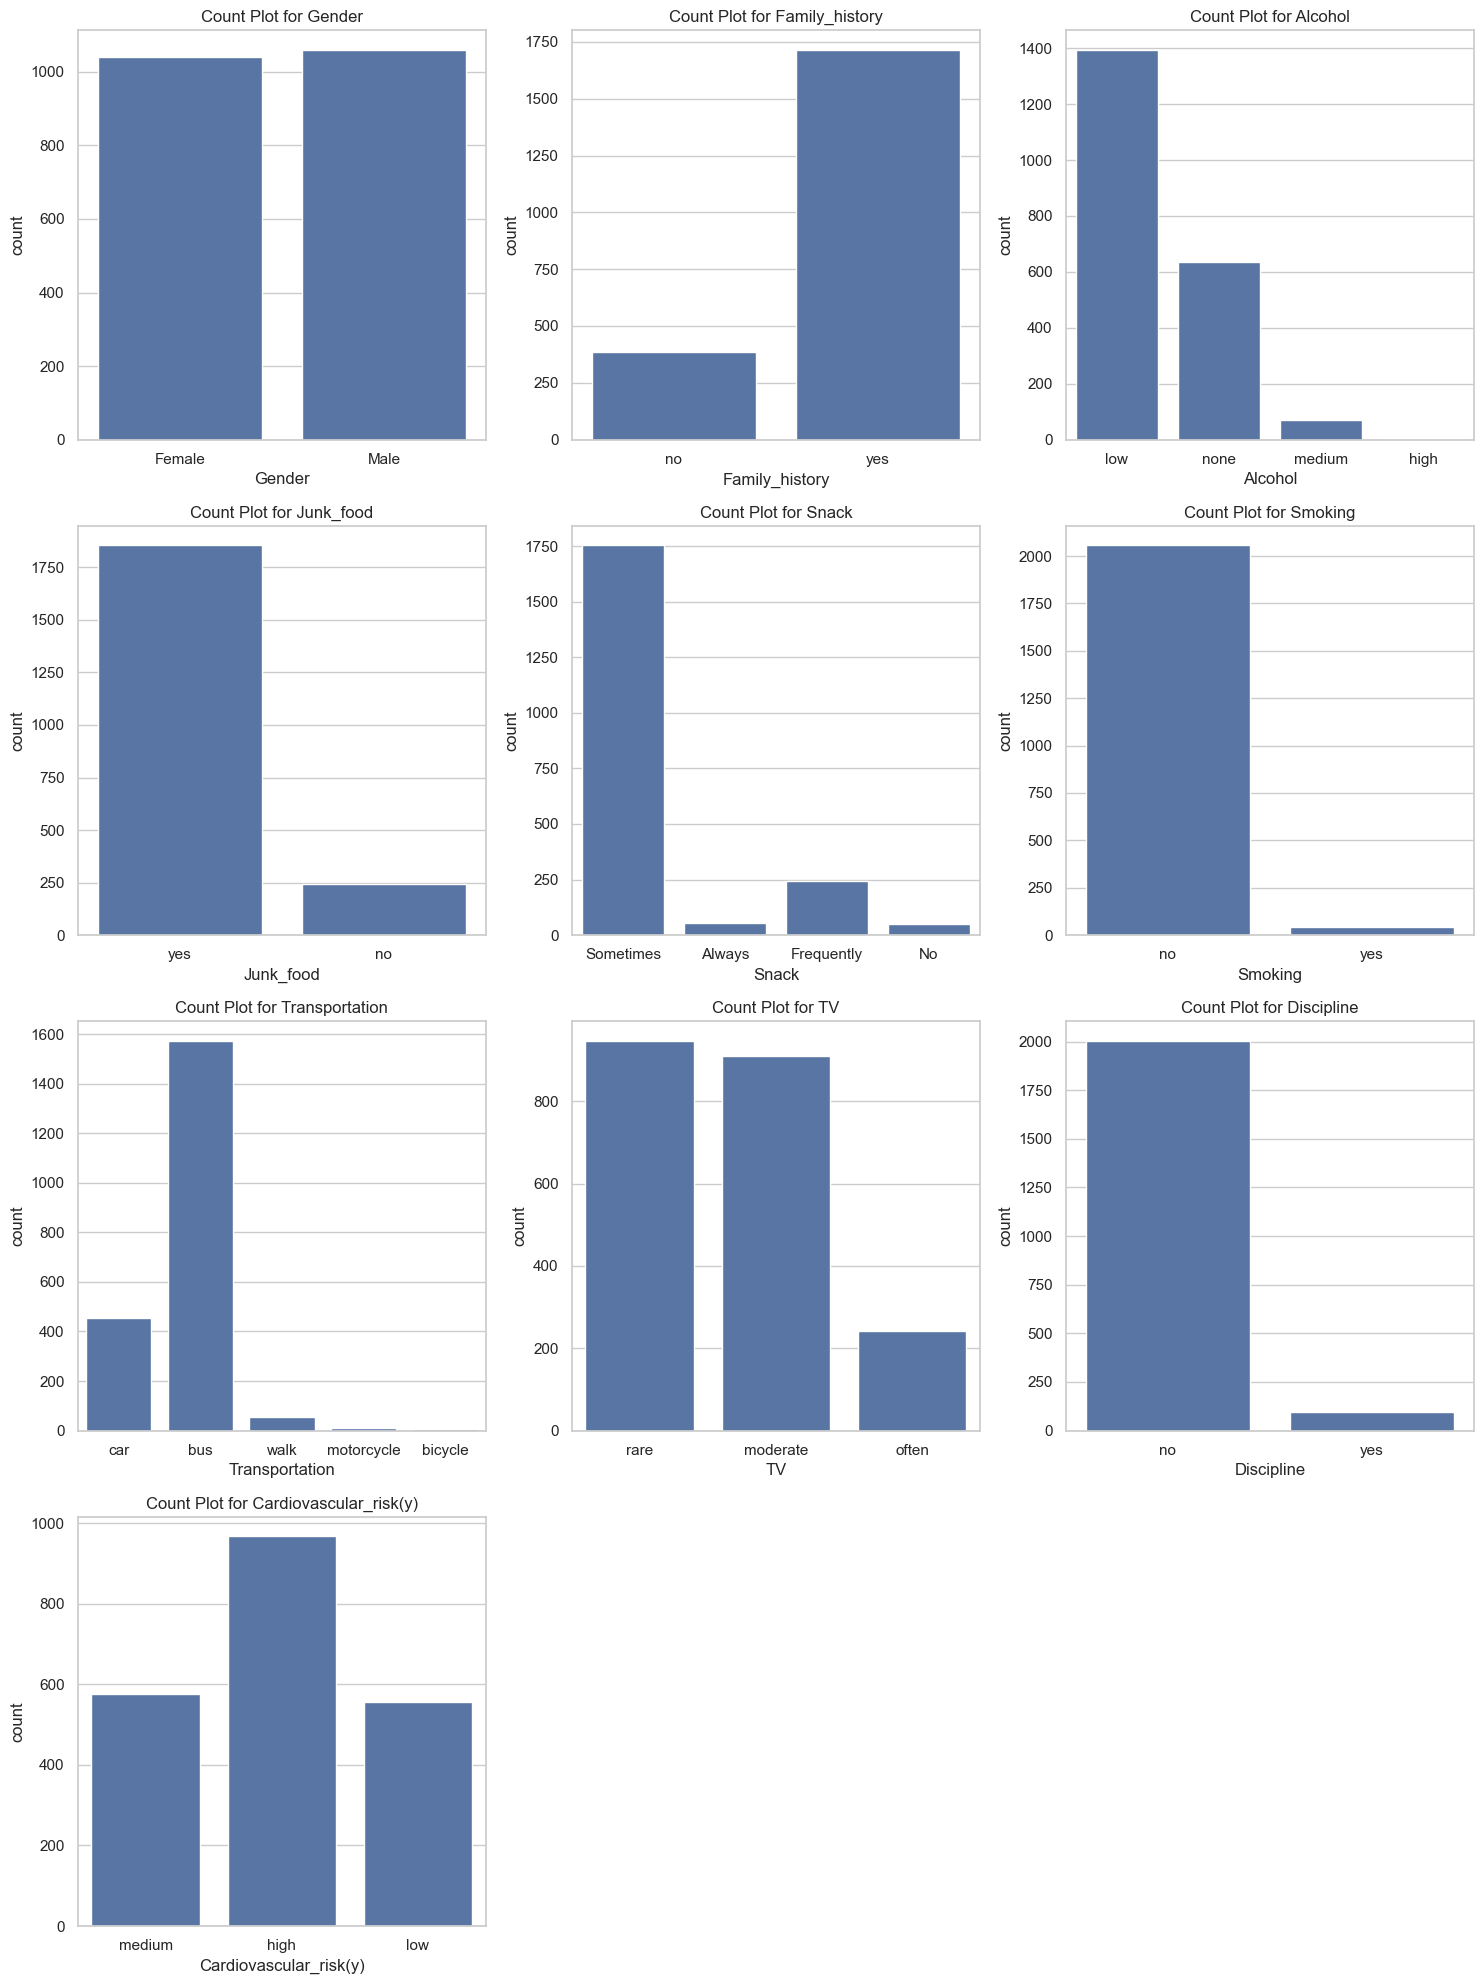

In [12]:
# Automatically identify all categorical features in the dataset
categorical_features = ds.select_dtypes(include=['object']).columns.tolist()

# Set up the number of rows and columns for the grid
n_rows = (len(categorical_features) + 2) // 3  # Calculate number of rows needed (3 columns per row)
n_cols = 3  # You can adjust this based on how many columns you want per row

# Create a grid of subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5 * n_rows))  # Adjust figsize dynamically based on n_rows

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Loop through each categorical feature and create a count plot on a subplot
for i, feature in enumerate(categorical_features):
    sns.countplot(data=ds, x=feature, ax=axes[i])
    axes[i].set_title(f'Count Plot for {feature}')

# Hide any empty subplots if the grid is larger than the number of features
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

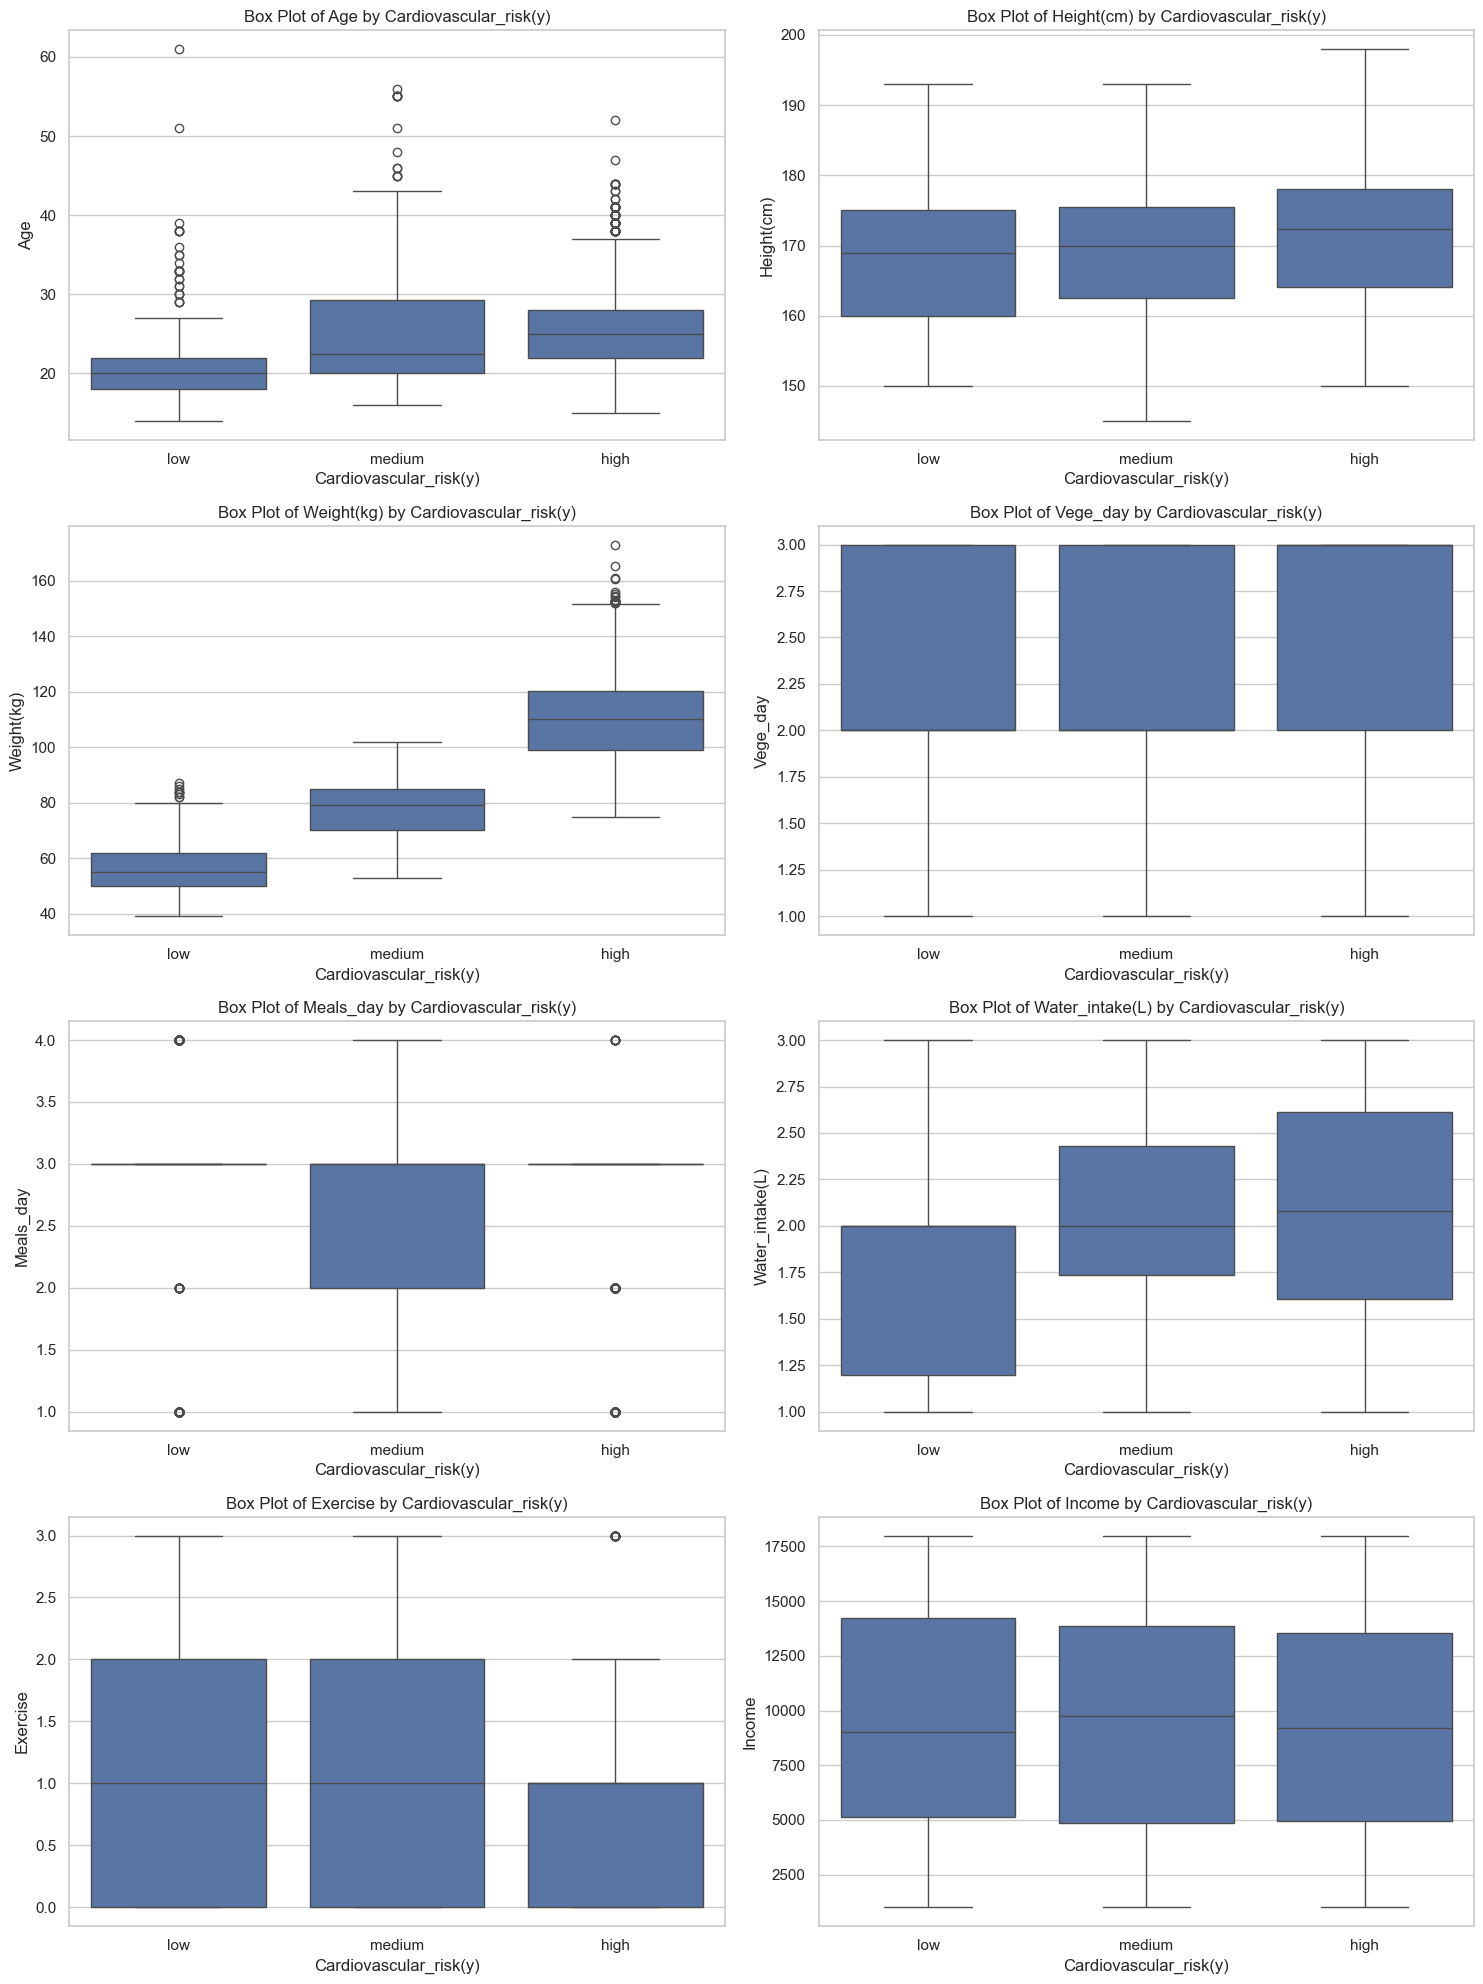

In [13]:
# Load your dataset (assuming it is loaded as 'ds')
# ds = pd.read_csv('dataset.csv')  # Uncomment and modify if the dataset needs to be loaded

# List all numerical features (columns) in the dataset 'ds'
numerical_features = ds.select_dtypes(include=['number']).columns.tolist()

# Define the categorical variable for comparison
categorical_variable = 'Cardiovascular_risk(y)'  # Replace with your actual categorical variable

# Specify the desired order of categories
category_order = ['low', 'medium', 'high']

# Set up the number of rows and columns for the grid
n_rows = (len(numerical_features) + 1) // 2  # Calculate number of rows needed (2 columns per row)
n_cols = 2  # Number of columns

# Create a grid of subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5 * n_rows))  # Adjust figsize dynamically based on n_rows

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Loop through each numerical feature and create a box plot on a subplot
for i, feature in enumerate(numerical_features):
    sns.boxplot(x=categorical_variable, y=feature, data=ds, ax=axes[i], order=category_order)
    axes[i].set_title(f'Box Plot of {feature} by {categorical_variable}')
    axes[i].set_xlabel(categorical_variable)
    axes[i].set_ylabel(feature)

# Hide any empty subplots if there are fewer features than subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()


## 2.3: Data Preprocessing 

## Training Set


In [14]:


# Assuming ds is already loaded
X = ds.drop('Cardiovascular_risk(y)', axis=1)
y = ds['Cardiovascular_risk(y)']

# Split dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=69)

# Separate numerical and categorical columns
X_train_num = X_train.drop(['Gender', 'Family_history', 'Alcohol', 'Junk_food', 'Snack', 'Smoking', 'Transportation', 'TV', 'Discipline'], axis=1)
X_train_cat_nom = X_train[['Gender', 'Family_history', 'Junk_food', 'Smoking', 'Transportation', 'Discipline']]  # Nominal
X_train_cat_ord = X_train[['Alcohol', 'Snack', 'TV']]  # Ordinal

# Standardize numeric data
scaler = StandardScaler()
X_train_num_tr = scaler.fit_transform(X_train_num)

# One-hot encode nominal categorical variables
onehot_encoder = OneHotEncoder(sparse_output=False)  # Ensure dense output for stacking later
X_train_cat_nom_encoded = onehot_encoder.fit_transform(X_train_cat_nom)


# Define the order for ordinal variables if needed (e.g., Alcohol: ['Never', 'Sometimes', 'Often'])
# You can specify your own ordering of the ordinal features below if applicable
ord_categories = [['none' ,'low' ,'medium' ,'high'],  # Example for Alcohol
                  ['No','Sometimes','Frequently', 'Always' ],  # Example for Snack
                  ['rare', 'moderate' ,'often']] # Example for TV

ordinal_encoder = OrdinalEncoder(categories=ord_categories)
X_train_cat_ord_encoded = ordinal_encoder.fit_transform(X_train_cat_ord)

# Check the mapping for ordinal variables
print("OrdinalEncoder Ordinal Categories Mapping:")

for i, feature in enumerate(X_train_cat_ord.columns):
    print(f"Feature '{feature}' is encoded as follows:")
    for category, encoding in zip(ordinal_encoder.categories_[i], range(len(ordinal_encoder.categories_[i]))):
        print(f"  {category}: {encoding}")  


# Combine the transformed nominal and ordinal categorical data
X_train_cat_encoded = np.hstack([X_train_cat_nom_encoded, X_train_cat_ord_encoded])

# Combine the transformed numerical and categorical sets
X_train_tr = np.hstack([X_train_num_tr, X_train_cat_encoded])
# Convert y_train to numpy array
y_train = y_train.values


OrdinalEncoder Ordinal Categories Mapping:
Feature 'Alcohol' is encoded as follows:
  none: 0
  low: 1
  medium: 2
  high: 3
Feature 'Snack' is encoded as follows:
  No: 0
  Sometimes: 1
  Frequently: 2
  Always: 3
Feature 'TV' is encoded as follows:
  rare: 0
  moderate: 1
  often: 2


## Testing Set

In [15]:
# Separate numerical and categorical columns for the test set
X_test_num = X_test.drop(['Gender', 'Family_history', 'Alcohol', 'Junk_food', 'Snack', 'Smoking', 'Transportation', 'TV', 'Discipline'], axis=1)
X_test_cat_nom = X_test[['Gender', 'Family_history', 'Junk_food', 'Smoking', 'Transportation', 'Discipline']]  # Nominal
X_test_cat_ord = X_test[['Alcohol', 'Snack', 'TV']]  # Ordinal

# # Impute missing values in numeric columns of the test set with the median (use already fitted imputer)
# X_test_num_tr = imputer.transform(X_test_num)

# Standardize numeric data for the test set (use already fitted scaler)
X_test_num_tr = scaler.transform(X_test_num)

# One-hot encode nominal categorical variables in the test set (use already fitted onehot_encoder)
X_test_cat_nom_encoded = onehot_encoder.transform(X_test_cat_nom)

# Ordinal encode ordinal categorical variables in the test set (use already fitted ordinal_encoder)
X_test_cat_ord_encoded = ordinal_encoder.transform(X_test_cat_ord)

# Combine the transformed nominal and ordinal categorical data for the test set
X_test_cat_encoded = np.hstack([X_test_cat_nom_encoded, X_test_cat_ord_encoded])

# Combine the transformed numerical and categorical sets for the test set
X_test_tr = np.hstack([X_test_num_tr, X_test_cat_encoded])

# Convert y_test to numpy array
y_test = y_test.values


In [16]:
print('X_train_tr shape:', X_train_tr.shape)
print('y_train shape:', y_train.shape)
print('X_test_tr shape:', X_test_tr.shape)
print('y_test shape:', y_test.shape)

X_train_tr shape: (1680, 26)
y_train shape: (1680,)
X_test_tr shape: (420, 26)
y_test shape: (420,)


## 2.4: Model Training & Validation

### Function for PR , ROC curve and AUC score

In [17]:
# Function to plot ROC curve
def plot_multiclass_pr_roc_curves(y_true, y_pred_scores, class_labels, model):
    """
    Plot ROC curves for multi-class classification using the SGD decision function.
    
    Parameters:
    y_true (array-like): True labels
    y_pred_scores (array-like): Decision function outputs from SGDClassifier
    class_labels (list): List of class labels
    model (str): The name of the model being evaluated
    
    Returns:
    dict: Dictionary containing AUC scores for each class
    """
    # Binarize the true labels (One-vs-Rest) for multiclass
    y_true_bin = label_binarize(y_true, classes=class_labels)
    n_classes = y_true_bin.shape[1]

    # ROC Curve
    plt.figure(figsize=(10, 6))
    auc_scores = {}

    auc_pr_scores = {}
    
    for i in range(n_classes):
        fpr, tpr, _ = roc_curve(y_true_bin[:, i], y_pred_scores[:, i])
        roc_auc = auc(fpr, tpr)
        auc_scores[class_labels[i]] = roc_auc
        plt.plot(fpr, tpr, lw=3, label=f'{class_labels[i]} (area = {roc_auc:.4f})')
    
    # Plot diagonal line (chance)
    plt.plot([0, 1], [0, 1], 'k--', lw=2)  # Diagonal line
    plt.xlabel('False Positive Rate', fontsize=14)
    plt.ylabel('True Positive Rate', fontsize=14)
    plt.title(f'One-vs-Rest ROC Curves for {model}', fontsize=16)
    plt.legend(loc="best")
    plt.show()

     # Precision-Recall Curves
    plt.figure(figsize=(10, 6))

    for i in range(n_classes):
        precisions, recalls, _ = precision_recall_curve(y_true_bin[:, i], y_pred_scores[:, i])
        pr_auc = auc(recalls, precisions)
        auc_pr_scores[class_labels[i]] = pr_auc
        plt.plot(recalls, precisions, lw=3, label=f'{class_labels[i]} (PR AUC = {pr_auc:.4f})')
    
    plt.xlabel('Recall', fontsize=14)
    plt.ylabel('Precision', fontsize=14)
    plt.title(f'One-vs-Rest Precision-Recall Curves for {model}', fontsize=16)
    plt.legend(loc="best")
    plt.show()

    print("ROC AUC Scores:")
    for label, score in auc_scores.items():
        print(f'AUC (ROC) {label} = {score:.4f}')
    
    print("\nPrecision-Recall AUC Scores:")
    for label, score in auc_pr_scores.items():
        print(f'AUC (PR) {label} = {score:.4f}')
    return {"auc_scores": auc_scores, "pr_auc_scores": auc_pr_scores}
# Step 7: Get class labels from the training set
class_labels = np.unique(y_train)  # List of class labels



## Model 1: Support Vector Machine (One Vs All Classifier) 

In [18]:

# Step 1: Create the SVC classifier

svm_clf = SVC(kernel='linear', probability=True, random_state=69)

# Wrap it with OneVsRestClassifier
ovr_clf = OneVsRestClassifier(svm_clf)

# Train the model
ovr_clf.fit(X_train_tr, y_train)

# Step 3: Predict on the training data
y_train_pred = ovr_clf.predict(X_train_tr)

train_accuracy = accuracy_score(y_train, y_train_pred)  # Calculate accuracy on training set
print(f"Accuracy on training set: {train_accuracy:.4f}")
print('Precision (macro) = {:.4f}'.format(precision_score(y_train, y_train_pred, average='macro')))
print('Recall (macro)    = {:.4f}'.format(recall_score(y_train, y_train_pred, average='macro')))
print('F1 score (macro)  = {:.4f}'.format(f1_score(y_train, y_train_pred, average='macro')))

# Cross-validation scores
cv_scores = cross_val_score(ovr_clf, X_train_tr, y_train, cv=3)
print(f"Cross-validation scores: {cv_scores}")
print(f"Mean cross-validation score: {cv_scores.mean():.4f}")

# Confusion matrix
conf_matrix = confusion_matrix(y_train, y_train_pred)
print("Confusion Matrix:")
print(conf_matrix)

Accuracy on training set: 0.9536
Precision (macro) = 0.9495
Recall (macro)    = 0.9445
F1 score (macro)  = 0.9459
Cross-validation scores: [0.91785714 0.95357143 0.93392857]
Mean cross-validation score: 0.9351
Confusion Matrix:
[[771   0   4]
 [  0 430  13]
 [ 22  39 401]]


# Cross Validation and ROC curve

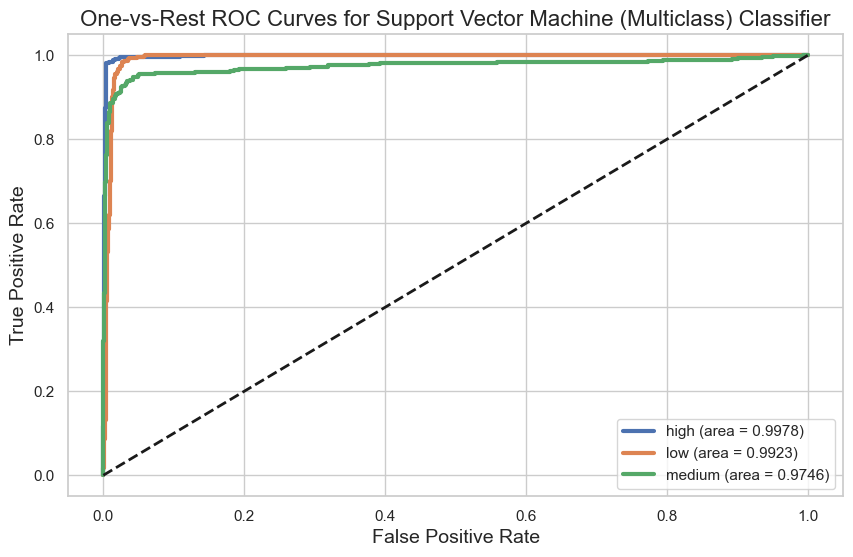

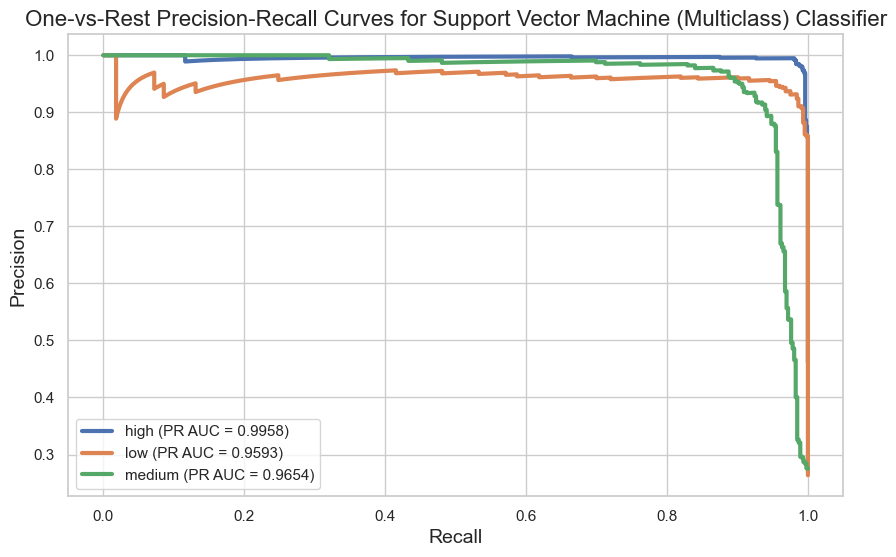

ROC AUC Scores:
AUC (ROC) high = 0.9978
AUC (ROC) low = 0.9923
AUC (ROC) medium = 0.9746

Precision-Recall AUC Scores:
AUC (PR) high = 0.9958
AUC (PR) low = 0.9593
AUC (PR) medium = 0.9654
Macro Average ROC AUC = 0.9882
Macro Average PR AUC = 0.9735


In [19]:
y_pred_cv = cross_val_predict(ovr_clf,X_train_tr,y_train,cv=3,method="predict_proba")
scores  = plot_multiclass_pr_roc_curves(y_train, y_pred_cv, class_labels, "Support Vector Machine (Multiclass) Classifier")
roc_auc_scores = scores['auc_scores']
pr_auc_scores = scores['pr_auc_scores']

# Calculate the macro average for ROC AUC
macro_avg_roc_auc = np.mean(list(roc_auc_scores.values()))
print(f'Macro Average ROC AUC = {macro_avg_roc_auc:.4f}')

# Calculate the macro average for PR AUC
macro_avg_pr_auc = np.mean(list(pr_auc_scores.values()))
print(f'Macro Average PR AUC = {macro_avg_pr_auc:.4f}')

# Evaluation on Test Set

In [20]:
# Predict on the test set
y_test_pred = ovr_clf.predict(X_test_tr)

# Evaluate model performance on the test set
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"Accuracy on test set: {test_accuracy:.4f}")
print('Precision (macro) = {:.4f}'.format(precision_score(y_test, y_test_pred, average='macro')))
print('Recall (macro)    = {:.4f}'.format(recall_score(y_test, y_test_pred, average='macro')))
print('F1 score (macro)  = {:.4f}'.format(f1_score(y_test, y_test_pred, average='macro')))

# Confusion Matrix for the test set
print("\nConfusion Matrix (Test Set):")
print(confusion_matrix(y_test, y_test_pred))

Accuracy on test set: 0.9310
Precision (macro) = 0.9243
Recall (macro)    = 0.9176
F1 score (macro)  = 0.9195

Confusion Matrix (Test Set):
[[190   0   2]
 [  0 108   6]
 [  8  13  93]]


## Model 2: Random Forest Classifier

In [21]:
# Initialize the Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=40, random_state=69)

# Train the model on the training data
rf_model.fit(X_train_tr, y_train)

# Predict on the training set
y_train_pred = rf_model.predict(X_train_tr)  # Predict using the training set

train_accuracy = accuracy_score(y_train, y_train_pred)  # Calculate accuracy on training set
print(f"Accuracy on training set: {train_accuracy:.4f}")
print('Precision (macro) = {:.4f}'.format(precision_score(y_train, y_train_pred, average='macro')))
print('Recall (macro)    = {:.4f}'.format(recall_score(y_train, y_train_pred, average='macro')))
print('F1 score (macro)  = {:.4f}'.format(f1_score(y_train, y_train_pred, average='macro')))
# Cross-validation scores
cv_scores = cross_val_score(rf_model, X_train_tr, y_train, cv=3)
print(f"Cross-validation scores: {cv_scores}")
print(f"Mean cross-validation score: {cv_scores.mean():.4f}")
conf_matrix = confusion_matrix(y_train, y_train_pred)
print("Confusion Matrix:")
print(conf_matrix)


Accuracy on training set: 1.0000
Precision (macro) = 1.0000
Recall (macro)    = 1.0000
F1 score (macro)  = 1.0000
Cross-validation scores: [0.94821429 0.9625     0.94642857]
Mean cross-validation score: 0.9524
Confusion Matrix:
[[775   0   0]
 [  0 443   0]
 [  0   0 462]]


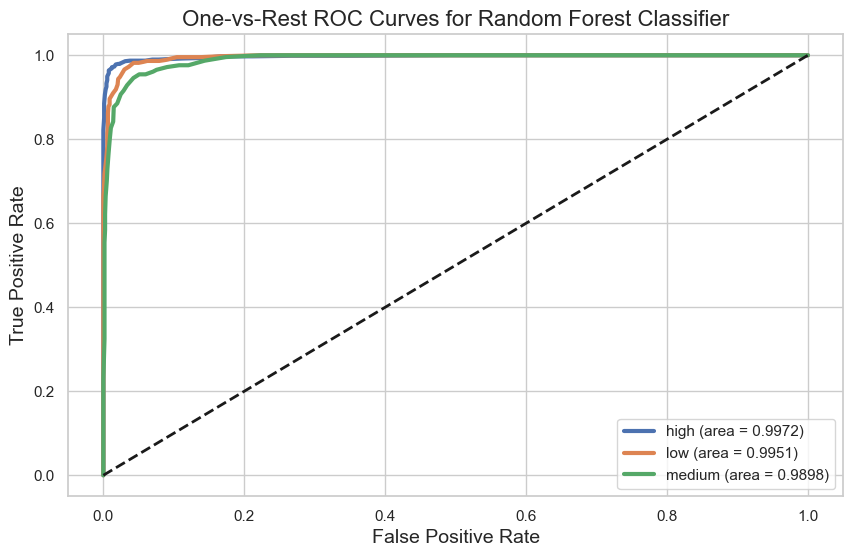

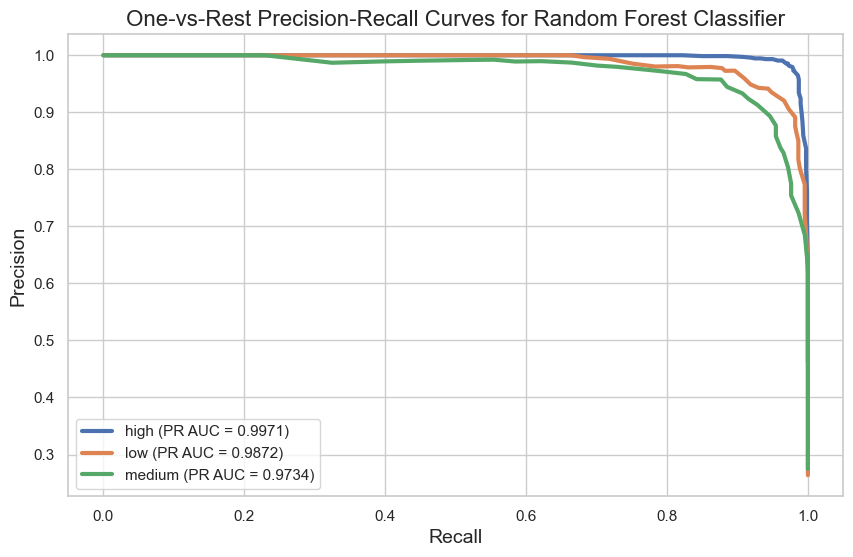

ROC AUC Scores:
AUC (ROC) high = 0.9972
AUC (ROC) low = 0.9951
AUC (ROC) medium = 0.9898

Precision-Recall AUC Scores:
AUC (PR) high = 0.9971
AUC (PR) low = 0.9872
AUC (PR) medium = 0.9734
Macro Average ROC AUC = 0.9882
Macro Average PR AUC = 0.9735


In [22]:
y_pred_cv = cross_val_predict(rf_model,X_train_tr,y_train,cv=3, method="predict_proba")
auc_scores = plot_multiclass_pr_roc_curves(y_train, y_pred_cv, class_labels, 'Random Forest Classifier')
roc_auc_scores = scores['auc_scores']
pr_auc_scores = scores['pr_auc_scores']

# Calculate the macro average for ROC AUC
macro_avg_roc_auc = np.mean(list(roc_auc_scores.values()))
print(f'Macro Average ROC AUC = {macro_avg_roc_auc:.4f}')

# Calculate the macro average for PR AUC
macro_avg_pr_auc = np.mean(list(pr_auc_scores.values()))
print(f'Macro Average PR AUC = {macro_avg_pr_auc:.4f}')

## Evaluate model on test set

In [23]:
# Predict on the test set
y_test_pred = rf_model.predict(X_test_tr)

test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"Accuracy on test set: {test_accuracy:.4f}")
print('Precision (macro) = {:.4f}'.format(precision_score(y_test, y_test_pred, average='macro')))
print('Recall (macro)    = {:.4f}'.format(recall_score(y_test, y_test_pred, average='macro')))
print('F1 score (macro)  = {:.4f}'.format(f1_score(y_test, y_test_pred, average='macro')))


# Confusion Matrix for the test set
print("\nConfusion Matrix (Test Set):")
print(confusion_matrix(y_test, y_test_pred))

Accuracy on test set: 0.9595
Precision (macro) = 0.9519
Recall (macro)    = 0.9539
F1 score (macro)  = 0.9524

Confusion Matrix (Test Set):
[[189   1   2]
 [  0 104  10]
 [  0   4 110]]


## Model 3: Logistic Regression (Multinomial)

In [24]:

# Initialize the Logistic Regression model
log_reg = LogisticRegression(solver='lbfgs', max_iter=1000, random_state=69)

# Train the model on the training data
log_reg.fit(X_train_tr, y_train)

# Predict on the training data
y_train_pred = log_reg.predict(X_train_tr)

# Evaluate the model on the training set
train_accuracy = accuracy_score(y_train, y_train_pred)
print(f'Accuracy on training set: {train_accuracy:.4f}')
print('Precision (macro) = {:.4f}'.format(precision_score(y_train, y_train_pred, average='macro')))
print('Recall (macro)    = {:.4f}'.format(recall_score(y_train, y_train_pred, average='macro')))
print('F1 score (macro)  = {:.4f}'.format(f1_score(y_train, y_train_pred, average='macro')))
cross_val_scores = cross_val_score(log_reg, X_train_tr, y_train, cv=3)
print(f'\nCross-validation scores: {cross_val_scores}')
print(f'Average cross-validation score: {cross_val_scores.mean():.4f}')
conf_matrix = confusion_matrix(y_train, y_train_pred)
print("Confusion Matrix:")
print(conf_matrix)

Accuracy on training set: 0.9810
Precision (macro) = 0.9777
Recall (macro)    = 0.9778
F1 score (macro)  = 0.9776

Cross-validation scores: [0.96071429 0.9625     0.96964286]
Average cross-validation score: 0.9643
Confusion Matrix:
[[770   0   5]
 [  0 424  19]
 [  2   6 454]]


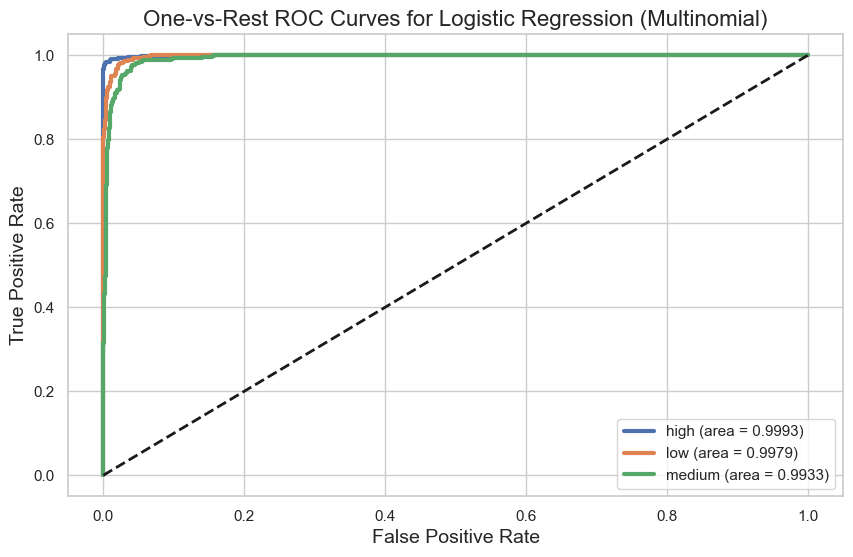

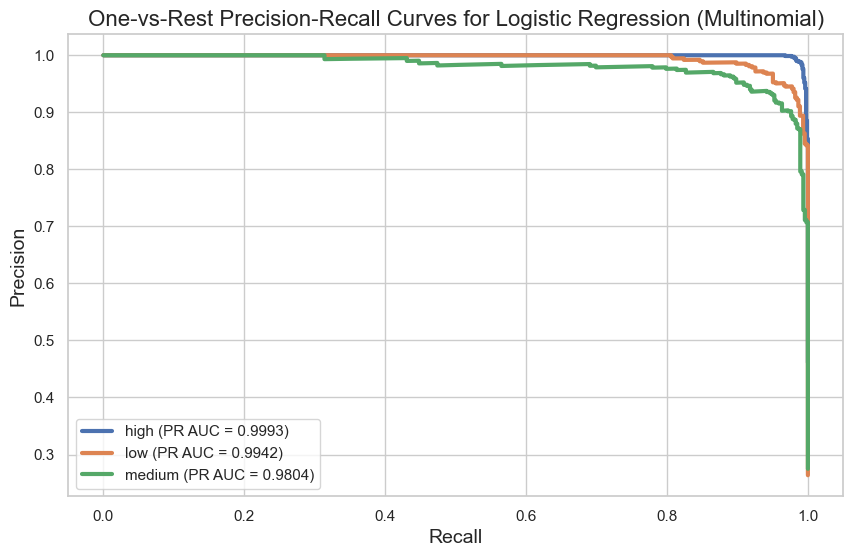

ROC AUC Scores:
AUC (ROC) high = 0.9993
AUC (ROC) low = 0.9979
AUC (ROC) medium = 0.9933

Precision-Recall AUC Scores:
AUC (PR) high = 0.9993
AUC (PR) low = 0.9942
AUC (PR) medium = 0.9804
Macro Average ROC AUC = 0.9882
Macro Average PR AUC = 0.9735


In [25]:
y_pred_cv = cross_val_predict(log_reg,X_train_tr,y_train,cv=3,method = "predict_proba")
auc_scores = plot_multiclass_pr_roc_curves(y_train, y_pred_cv, class_labels, 'Logistic Regression (Multinomial)')
roc_auc_scores = scores['auc_scores']
pr_auc_scores = scores['pr_auc_scores']

# Calculate the macro average for ROC AUC
macro_avg_roc_auc = np.mean(list(roc_auc_scores.values()))
print(f'Macro Average ROC AUC = {macro_avg_roc_auc:.4f}')

# Calculate the macro average for PR AUC
macro_avg_pr_auc = np.mean(list(pr_auc_scores.values()))
print(f'Macro Average PR AUC = {macro_avg_pr_auc:.4f}')

## Evaluation with Test Set

In [26]:
# Predict on the test data
y_pred = log_reg.predict(X_test_tr)

# Evaluate the model on the test set
test_accuracy = accuracy_score(y_test, y_pred)
print(f'\nAccuracy on test set: {test_accuracy:.4f}')
print('Precision (macro) = {:.4f}'.format(precision_score(y_test, y_test_pred, average='macro')))
print('Recall (macro)    = {:.4f}'.format(recall_score(y_test, y_test_pred, average='macro')))
print('F1 score (macro)  = {:.4f}'.format(f1_score(y_test, y_test_pred, average='macro')))

# Confusion matrix for the test set
print("\nConfusion Matrix (Test Set):")
cm_test = confusion_matrix(y_test, y_pred)
print(cm_test)



Accuracy on test set: 0.9714
Precision (macro) = 0.9519
Recall (macro)    = 0.9539
F1 score (macro)  = 0.9524

Confusion Matrix (Test Set):
[[190   0   2]
 [  0 105   9]
 [  1   0 113]]


## 2.5: Model Tuning and Testing

## SVM Classifier

In [27]:

# Define the parameter grid
param_grid = {
    'estimator__C': [0.1, 1, 10, 100],        # Regularization parameter
    'estimator__kernel': ['linear', 'rbf'],   # Kernel type
    'estimator__gamma': ['scale', 'auto']  
}

# Initialize GridSearchCV for SGDClassifier
grid_search_svm = GridSearchCV(ovr_clf, param_grid, cv=3, scoring='accuracy')


# Fit GridSearchCV
grid_search_svm.fit(X_train_tr, y_train)

# Print the best parameters and best score
print("Best Parameters for SVMClassifier:", grid_search_svm.best_params_)
print("Best Cross-Validation Score for SVMClassifier:", grid_search_svm.best_score_)

Best Parameters for SVMClassifier: {'estimator__C': 100, 'estimator__gamma': 'scale', 'estimator__kernel': 'linear'}
Best Cross-Validation Score for SVMClassifier: 0.9744047619047619


In [28]:
y_pred_at =grid_search_svm.predict(X_train_tr)
train_accuracy = accuracy_score(y_train, y_pred_at)  
print(f"Accuracy on training set: {train_accuracy:.4f}")
print('Precision (macro) = {:.4f}'.format(precision_score(y_train, y_pred_at, average='macro')))
print('Recall (macro)    = {:.4f}'.format(recall_score(y_train, y_pred_at, average='macro')))
print('F1 score (macro)  = {:.4f}'.format(f1_score(y_train, y_pred_at, average='macro')))
conf_matrix = confusion_matrix(y_train, y_pred_at)
print("Confusion Matrix:")
print(conf_matrix)

Accuracy on training set: 0.9869
Precision (macro) = 0.9856
Recall (macro)    = 0.9843
F1 score (macro)  = 0.9849
Confusion Matrix:
[[774   0   1]
 [  0 440   3]
 [  6  12 444]]


## RandomForest Classifier

In [29]:
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize GridSearchCV for RandomForestClassifier
grid_search_rf = GridSearchCV(RandomForestClassifier(random_state=69), param_grid_rf, cv=3, scoring='accuracy')

# Fit GridSearchCV
grid_search_rf.fit(X_train_tr, y_train)

# Print the best parameters and best score
print("Best Parameters for RandomForestClassifier:", grid_search_rf.best_params_)
print("Best Cross-Validation Score for RandomForestClassifier:", grid_search_rf.best_score_)

Best Parameters for RandomForestClassifier: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best Cross-Validation Score for RandomForestClassifier: 0.9577380952380953


In [30]:
y_pred_at = grid_search_rf.predict(X_train_tr)

train_accuracy = accuracy_score(y_train, y_pred_at)  
print(f"Accuracy on training set: {train_accuracy:.4f}")
print('Precision (macro) = {:.4f}'.format(precision_score(y_train, y_pred_at, average='macro')))
print('Recall (macro)    = {:.4f}'.format(recall_score(y_train, y_pred_at, average='macro')))
print('F1 score (macro)  = {:.4f}'.format(f1_score(y_train, y_pred_at, average='macro')))
conf_matrix = confusion_matrix(y_train, y_pred_at)
print("Confusion Matrix:")
print(conf_matrix)

Accuracy on training set: 1.0000
Precision (macro) = 1.0000
Recall (macro)    = 1.0000
F1 score (macro)  = 1.0000
Confusion Matrix:
[[775   0   0]
 [  0 443   0]
 [  0   0 462]]


## Logistic Classifier

In [31]:
param_grid_lr = {
    'C': [0.001, 0.01, 0.1, 1, 10],
    'penalty': ['l2'],
    'solver': ['lbfgs', 'liblinear'],
    'max_iter': [100, 200, 300]
}

# Initialize GridSearchCV for LogisticRegression use 3 cross-fold instead to avoid limit reach
grid_search_lr = GridSearchCV(LogisticRegression(random_state=69), param_grid_lr, cv=3, scoring='accuracy')

# Fit GridSearchCV
grid_search_lr.fit(X_train_tr, y_train)

# Print the best parameters and best score
print("Best Parameters for LogisticRegression:", grid_search_lr.best_params_)
print("Best Cross-Validation Score for LogisticRegression:", grid_search_lr.best_score_)

Best Parameters for LogisticRegression: {'C': 10, 'max_iter': 100, 'penalty': 'l2', 'solver': 'lbfgs'}
Best Cross-Validation Score for LogisticRegression: 0.9755952380952381


In [32]:
y_pred_at = grid_search_lr.predict(X_train_tr)

train_accuracy = accuracy_score(y_train, y_pred_at)  
print(f"Accuracy on training set: {train_accuracy:.4f}")
print('Precision (macro) = {:.4f}'.format(precision_score(y_train, y_pred_at, average='macro')))
print('Recall (macro)    = {:.4f}'.format(recall_score(y_train, y_pred_at, average='macro')))
print('F1 score (macro)  = {:.4f}'.format(f1_score(y_train, y_pred_at, average='macro')))
conf_matrix = confusion_matrix(y_train, y_pred_at)
print("Confusion Matrix:")
print(conf_matrix)

Accuracy on training set: 0.9911
Precision (macro) = 0.9892
Recall (macro)    = 0.9901
F1 score (macro)  = 0.9896
Confusion Matrix:
[[771   0   4]
 [  0 435   8]
 [  0   3 459]]


## Evaluate on test set

In [33]:
y_pred_chosen = grid_search_svm.predict(X_test_tr)
train_accuracy = accuracy_score(y_test, y_pred_chosen)  
print(f"Accuracy on test set: {train_accuracy:.4f}")
print('Precision (macro) = {:.4f}'.format(precision_score(y_test, y_pred_chosen, average='macro')))
print('Recall (macro)    = {:.4f}'.format(recall_score(y_test, y_pred_chosen, average='macro')))
print('F1 score (macro)  = {:.4f}'.format(f1_score(y_test, y_pred_chosen, average='macro')))
conf_matrix = confusion_matrix(y_test, y_pred_chosen)
print("Confusion Matrix:")
print(conf_matrix)

Accuracy on test set: 0.9929
Precision (macro) = 0.9936
Recall (macro)    = 0.9912
F1 score (macro)  = 0.9924
Confusion Matrix:
[[192   0   0]
 [  0 113   1]
 [  2   0 112]]


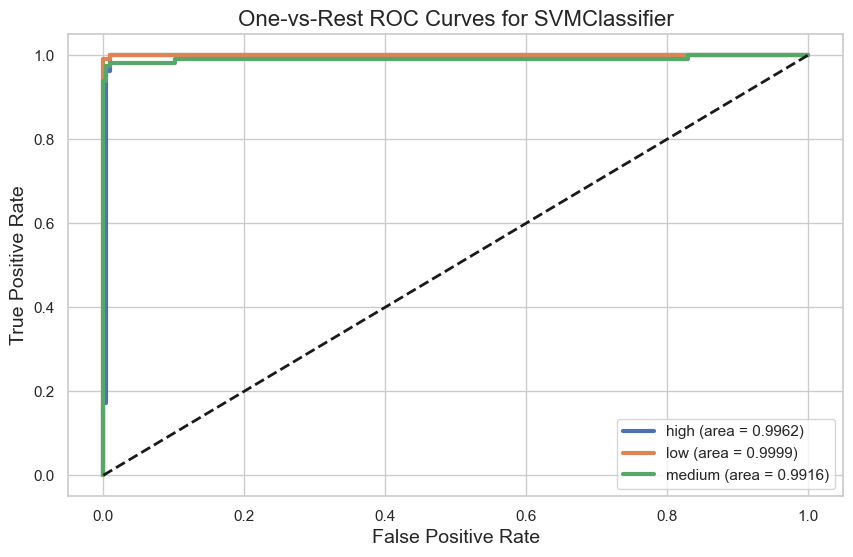

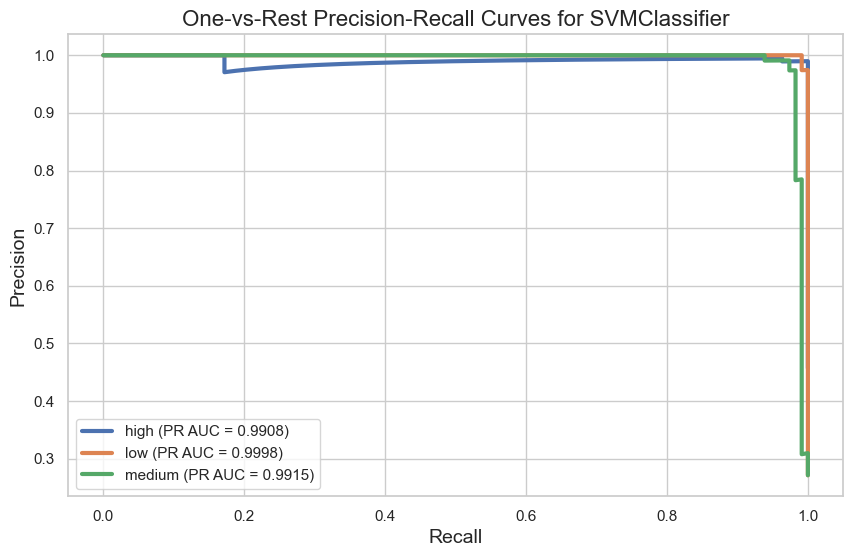

ROC AUC Scores:
AUC (ROC) high = 0.9962
AUC (ROC) low = 0.9999
AUC (ROC) medium = 0.9916

Precision-Recall AUC Scores:
AUC (PR) high = 0.9908
AUC (PR) low = 0.9998
AUC (PR) medium = 0.9915
Macro Average ROC AUC = 0.9959
Macro Average PR AUC = 0.9940


In [34]:
y_pred_roc = grid_search_svm.predict_proba(X_test_tr)
auc_scores = plot_multiclass_pr_roc_curves(y_test, y_pred_roc, class_labels, 'SVMClassifier')
roc_auc_scores = auc_scores['auc_scores']
pr_auc_scores = auc_scores['pr_auc_scores']

# Calculate the macro average for ROC AUC
macro_avg_roc_auc = np.mean(list(roc_auc_scores.values()))
print(f'Macro Average ROC AUC = {macro_avg_roc_auc:.4f}')

# Calculate the macro average for PR AUC
macro_avg_pr_auc = np.mean(list(pr_auc_scores.values()))
print(f'Macro Average PR AUC = {macro_avg_pr_auc:.4f}')

In [35]:
y_pred_chosen = grid_search_rf.predict(X_test_tr)
train_accuracy = accuracy_score(y_test, y_pred_chosen)  
print(f"Accuracy on test set: {train_accuracy:.4f}")
print('Precision (macro) = {:.4f}'.format(precision_score(y_test, y_pred_chosen, average='macro')))
print('Recall (macro)    = {:.4f}'.format(recall_score(y_test, y_pred_chosen, average='macro')))
print('F1 score (macro)  = {:.4f}'.format(f1_score(y_test, y_pred_chosen, average='macro')))
conf_matrix = confusion_matrix(y_test, y_pred_chosen)
print("Confusion Matrix:")
print(conf_matrix)

Accuracy on test set: 0.9667
Precision (macro) = 0.9606
Recall (macro)    = 0.9603
F1 score (macro)  = 0.9597
Confusion Matrix:
[[191   0   1]
 [  0 104  10]
 [  0   3 111]]


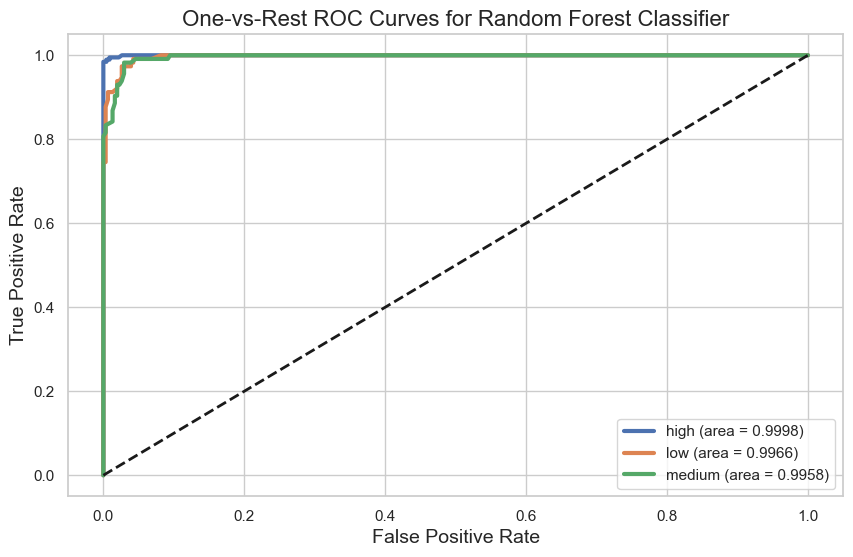

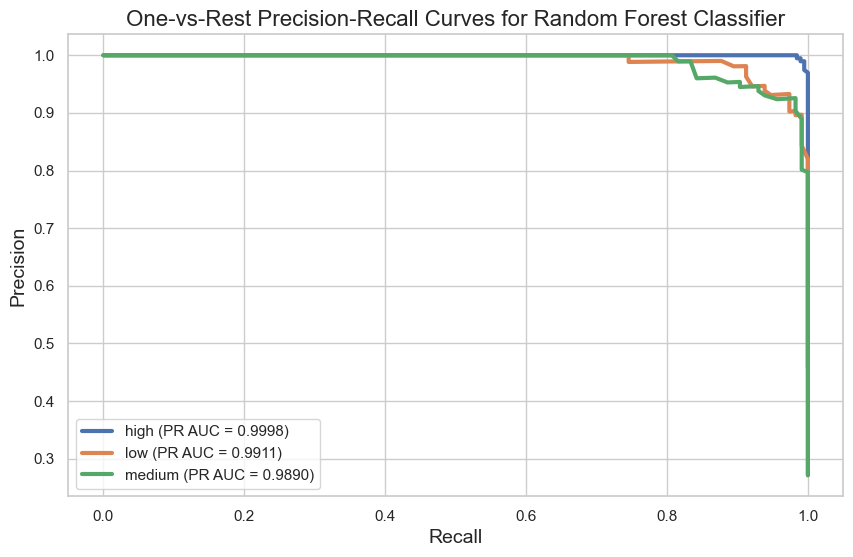

ROC AUC Scores:
AUC (ROC) high = 0.9998
AUC (ROC) low = 0.9966
AUC (ROC) medium = 0.9958

Precision-Recall AUC Scores:
AUC (PR) high = 0.9998
AUC (PR) low = 0.9911
AUC (PR) medium = 0.9890
Macro Average ROC AUC = 0.9974
Macro Average PR AUC = 0.9933


In [36]:
y_pred_roc = grid_search_rf.predict_proba(X_test_tr)

auc_scores = plot_multiclass_pr_roc_curves(y_test, y_pred_roc, class_labels, 'Random Forest Classifier')
roc_auc_scores = auc_scores['auc_scores']
pr_auc_scores = auc_scores['pr_auc_scores']

# Calculate the macro average for ROC AUC
macro_avg_roc_auc = np.mean(list(roc_auc_scores.values()))
print(f'Macro Average ROC AUC = {macro_avg_roc_auc:.4f}')

# Calculate the macro average for PR AUC
macro_avg_pr_auc = np.mean(list(pr_auc_scores.values()))
print(f'Macro Average PR AUC = {macro_avg_pr_auc:.4f}')

In [37]:
y_pred_chosen = grid_search_lr.predict(X_test_tr)
train_accuracy = accuracy_score(y_test, y_pred_chosen)  
print(f"Accuracy on test set: {train_accuracy:.4f}")
print('Precision (macro) = {:.4f}'.format(precision_score(y_test, y_pred_chosen, average='macro')))
print('Recall (macro)    = {:.4f}'.format(recall_score(y_test, y_pred_chosen, average='macro')))
print('F1 score (macro)  = {:.4f}'.format(f1_score(y_test, y_pred_chosen, average='macro')))
conf_matrix = confusion_matrix(y_test, y_pred_chosen)
print("Confusion Matrix:")
print(conf_matrix)

Accuracy on test set: 0.9929
Precision (macro) = 0.9925
Recall (macro)    = 0.9912
F1 score (macro)  = 0.9918
Confusion Matrix:
[[192   0   0]
 [  0 112   2]
 [  1   0 113]]


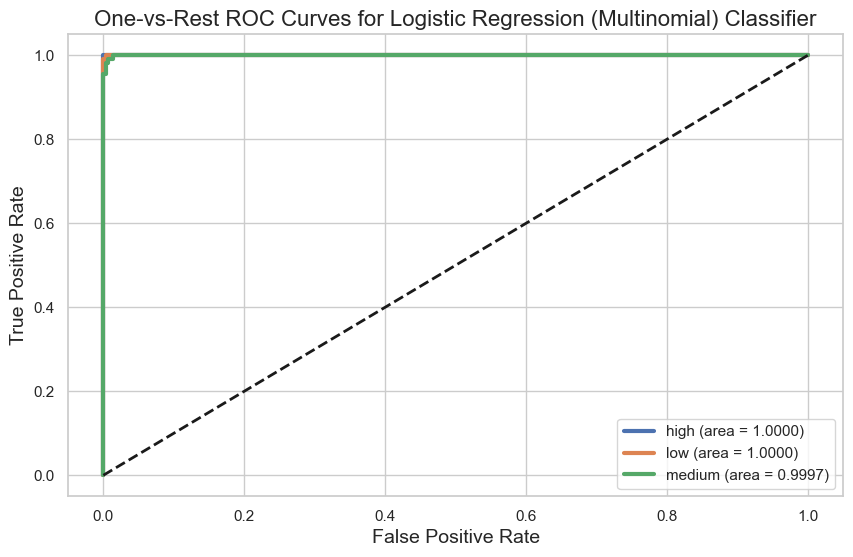

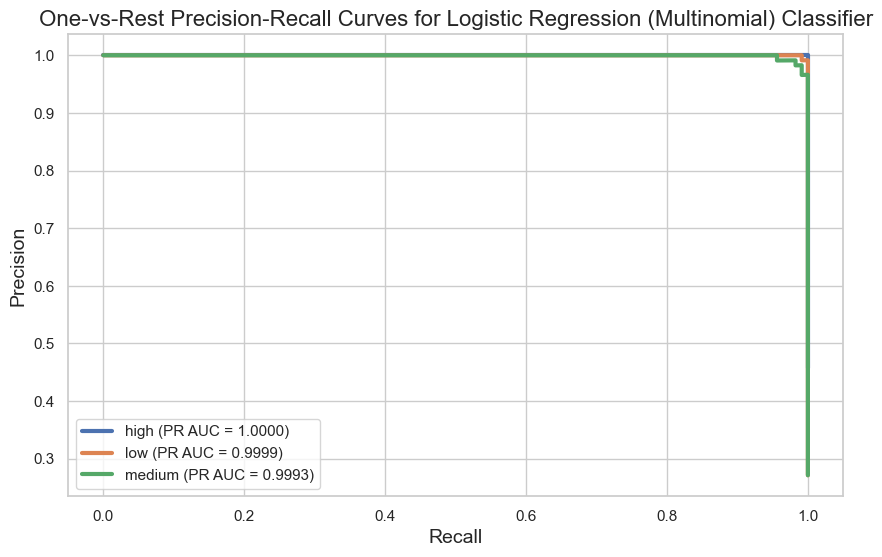

ROC AUC Scores:
AUC (ROC) high = 1.0000
AUC (ROC) low = 1.0000
AUC (ROC) medium = 0.9997

Precision-Recall AUC Scores:
AUC (PR) high = 1.0000
AUC (PR) low = 0.9999
AUC (PR) medium = 0.9993
Macro Average ROC AUC = 0.9999
Macro Average PR AUC = 0.9997


In [38]:
y_pred_roc = grid_search_lr.predict_proba(X_test_tr)

auc_scores = plot_multiclass_pr_roc_curves(y_test, y_pred_roc, class_labels, 'Logistic Regression (Multinomial) Classifier')
roc_auc_scores = auc_scores['auc_scores']
pr_auc_scores = auc_scores['pr_auc_scores']

# Calculate the macro average for ROC AUC
macro_avg_roc_auc = np.mean(list(roc_auc_scores.values()))
print(f'Macro Average ROC AUC = {macro_avg_roc_auc:.4f}')

# Calculate the macro average for PR AUC
macro_avg_pr_auc = np.mean(list(pr_auc_scores.values()))
print(f'Macro Average PR AUC = {macro_avg_pr_auc:.4f}')

# SECTION 3: FEATURE INVESTIGATION

## Feature Names

In [39]:
# Numerical feature names
numerical_features = X_train_num.columns.tolist()

# Nominal feature names (from one-hot encoding)
nominal_features = onehot_encoder.get_feature_names_out(X_train_cat_nom.columns.tolist())

# Ordinal feature names (directly from the ordinal columns)
ordinal_features = X_train_cat_ord.columns.tolist()
all_feature_names = numerical_features + nominal_features.tolist() + ordinal_features

## Feature Importance using Random Forest

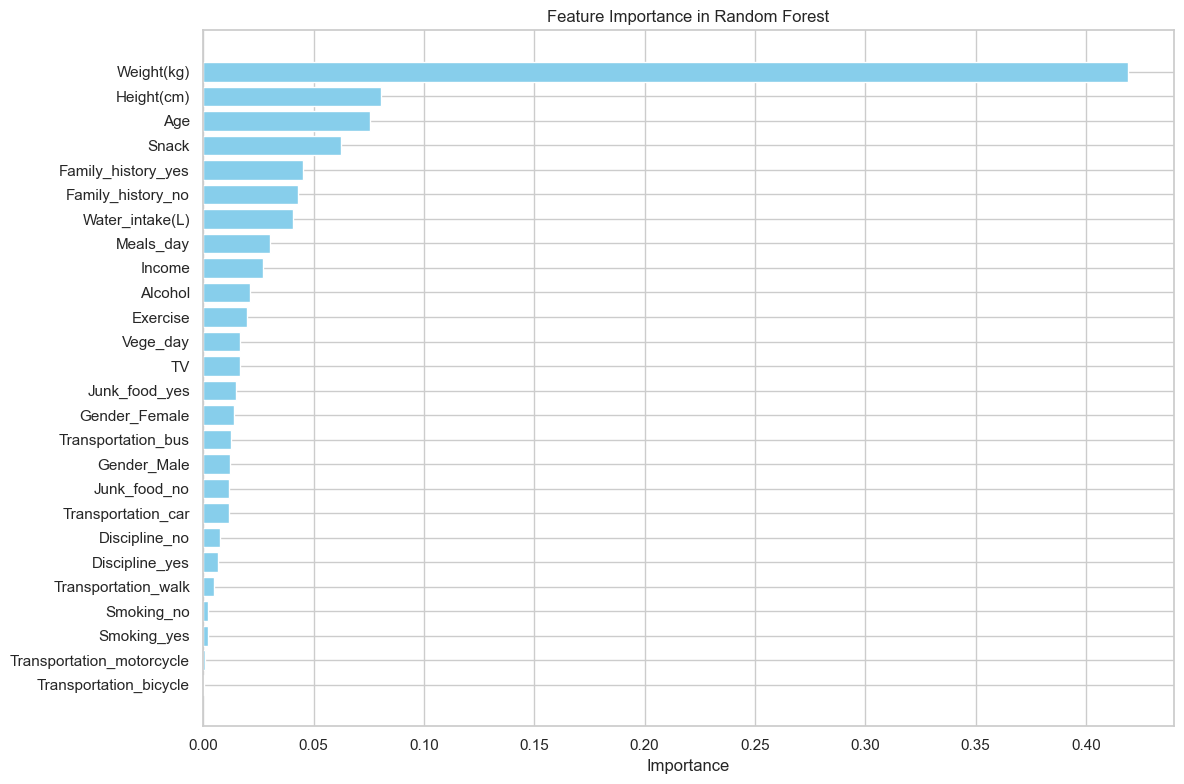

In [40]:
# Get feature importances from the trained RandomForest model
best_rf = grid_search_rf.best_estimator_
feature_importance = best_rf.feature_importances_

# Sort features by importance
feature_importance_sorted = sorted(zip(feature_importance, all_feature_names))

# Unzip the sorted feature importance values and names
importances, names = zip(*feature_importance_sorted)

# Plot feature importance as a horizontal bar chart
plt.figure(figsize=(12, 8))
plt.barh(names, importances, color='skyblue')
plt.xlabel('Importance')
plt.title('Feature Importance in Random Forest')
plt.tight_layout()
plt.show()

In [41]:
def plot_feature_importance_for_class(class_idx, coef_matrix, feature_names):
    """
    Plots the top 10 important features for a given class in a logistic regression OvR model.

    Parameters:
    - class_idx: Index of the class to plot
    - coef_matrix: Coefficients matrix from the logistic regression model
    - feature_names: List of feature names
    """
    # Get coefficients for the current class
    class_coefficients = coef_matrix[class_idx]

    # Create a DataFrame with features and their coefficients
    feature_importance = pd.DataFrame({
        'Feature': feature_names,
        'Coefficient': class_coefficients
    })

    # Sort by absolute coefficient values
    feature_importance['Absolute_Coefficient'] = np.abs(feature_importance['Coefficient'])
    feature_importance = feature_importance.sort_values(by='Absolute_Coefficient', ascending=False)

    # Select the top 10 important features
    top_10_features = feature_importance.head(10)

    # Plot the top 10 feature importance with positive/negative color coding
    plt.figure(figsize=(10, 6))
    colors = np.where(top_10_features['Coefficient'] > 0, 'green', 'red')  # Green for positive, Red for negative
    plt.barh(top_10_features['Feature'], top_10_features['Coefficient'], color=colors)
    plt.xlabel('Coefficient Value')

    plt.gca().invert_yaxis()  # Highest values at the top
    plt.show()

Coefficient Magnitude:

    Positive Coefficients: Indicate that an increase in the feature value is associated with an increased probability of the positive class.
    Negative Coefficients: Indicate that an increase in the feature value is associated with a decreased probability of the positive class.

## Analysis of the coeffiecient of multinomial logistic regression model

In [42]:
# Assuming the best logistic regression model
best_lr = grid_search_lr.best_estimator_

# Get class names
class_names = best_lr.classes_

# Get the number of classes and features
n_classes, n_features = best_lr.coef_.shape

Top 10 important features for Class: high (Logistic Regression- OvR)


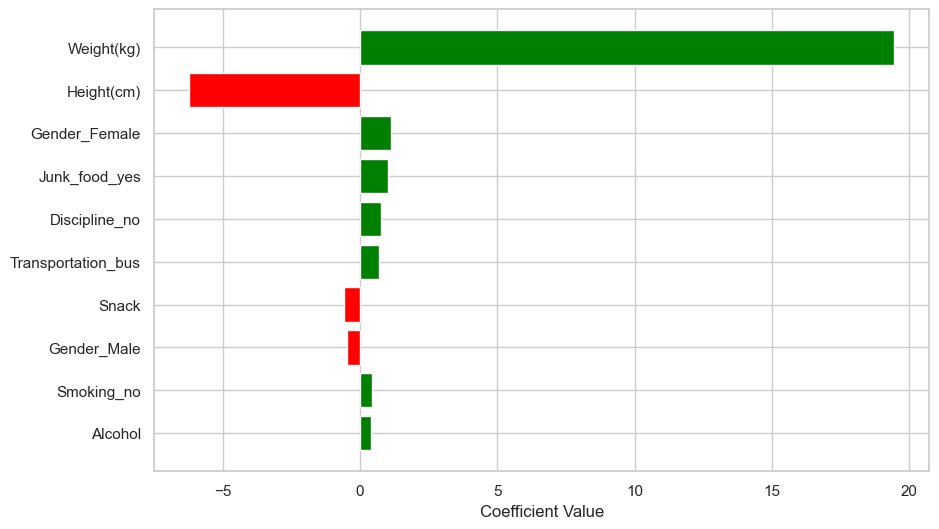

Top 10 important features for Class: low (Logistic Regression- OvR)


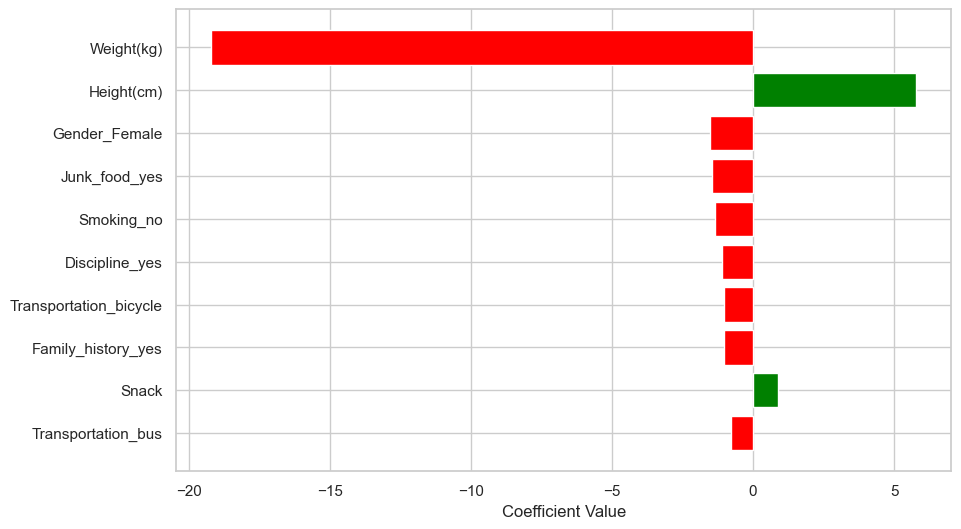

Top 10 important features for Class: medium (Logistic Regression- OvR)


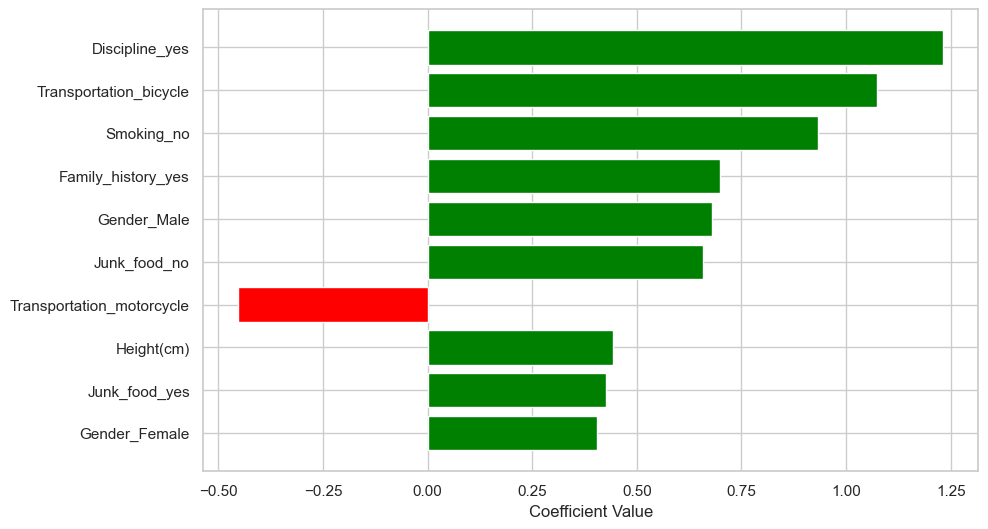

In [43]:
# Call the function separately for each class
for idx,class_name in enumerate(class_names):
    print(f"Top 10 important features for Class: {class_name} (Logistic Regression- OvR)")
    plot_feature_importance_for_class(idx, best_lr.coef_, all_feature_names)
